## To find the poisson distribution

$P(X = r) = \frac{e^{-m}*{m^r}}{r!}  $

Where 
- e = exponential constant `(2.718281828459045) mostly`
- m = mean $\mu$ = n*p
- r = random variable


In [ ]:
import math            

n = 200
p = 0.12
x = 2

m = p * n
ans = 0
temp = list()
e = math.e**-m

for i in range(x + 1):
    temp.append(e * m**i / math.factorial(i))
    print(f"P(X = {i}) = {temp[i]}")

for item in temp:
    ans += item


print(f"\nTotal probability = {ans}")
print(f"1 - P(X = {x}) = 1 - {ans} = {1 - ans}")

## Hypothesis Z value calculator

In [40]:
import math

n1 = 400
p1 = 20/n1

n2 = 300
p2 = 10/n2

p_hat = (n1*p1 + n2*p2) / (n1 + n2)
print(f"p hat = {p_hat}")
upper_exp = p1 - p2
lower_exp = math.sqrt(
    p_hat * (1-p_hat) * (1/n1 + 1/n2)
)
print(f"Upper expression = {upper_exp}")
print(f"Lower expression = {lower_exp}")

z_score = upper_exp / lower_exp

print(f"Z score = {abs(z_score)}")


p hat = 0.04285714285714286
Upper expression = 0.01666666666666667
Lower expression = 0.01546886273407694
Z score = 1.0774332252590906


Mean Squared Error: 2900.193628493482


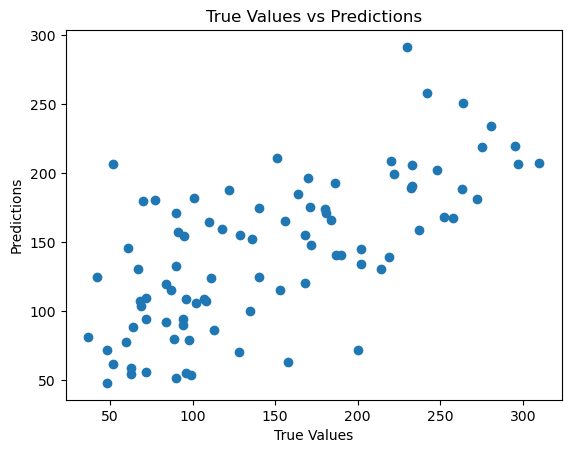

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diabetes  dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()



## Small language model

In [44]:
import tensorflow as tf
import numpy as np

# Generate some sample data
text = "hello world"
vocab = sorted(set(text))
char2idx = {char: idx for idx, char in enumerate(vocab)}
idx2char = np.array(vocab)

# Convert characters to indices
text_as_int = np.array([char2idx[char] for char in text])

# Create input and target sequences
seq_length = 4
examples_per_epoch = len(text) // seq_length
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Create the model
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

model = build_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=1
)

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Train the model
dataset = dataset.shuffle(10000).batch(1, drop_remainder=True)

history = model.fit(dataset, epochs=50)


ModuleNotFoundError: No module named 'tensorflow'